<center><h1> Homework 2 </h2>
Supervised Machine Learning DS-5220 - Fall 2021 

</center>



<center>Submitted by : Apoorva Surendra Malemath </center>

<b>1.Ridge Regression  </b>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from numpy.linalg import inv
import math
import scipy.io
import matplotlib.pyplot as plt
from scipy.optimize import fmin_tnc
from pandas.core.common import SettingWithCopyWarning

import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
def createPhiX(x,n):
  # The function createPhix constructs a rich feature vector   
  #x is the vector
  #n denotes the maximum degree of x 

  # Appending theta0 i.e. 1 as the first column
  x.insert(0,0, 1)
  colX=x.iloc[: , -1] # Extracting col x
  if(n==1):
    return x
  else:
    for i in range(2,n+1):
      colname="x"+str(i)
      x.insert(i,colname,colX**i) #appending column x with ith power

  return x    


<b>createPhix</b> constructs a rich feature vector. The function accepts an input vector with dimenssion 1 and the value n which denotes the maximum degree of x. <br>

The function performs the following actions: 

1. Appends $θ_{0}$ with values 1.
2. Appends the values $x^2$, $x^3$ .. $x^n$ based on the value of n.
3.  Return the resultant matrix $\phi(x_i)$

In [3]:
def trainModelRidge(trainX,trainY,Lambda):
  # The function trainModel implements the closed form solution. 
  dim=trainX.shape[1]
  I=np.identity(dim)
  theta = np.dot(inv(np.dot(np.transpose(trainX),trainX)+np.multiply(I,Lambda))
  ,np.dot(np.transpose(trainX), trainY))
  
  return theta

<b>trainModelRidge</b> implements the closed form solution using the below equation: <br>

$\tilde{\theta}$ = $(x^Tx + \lambda I)^{-1}x^Ty$

Returns the value for $\tilde{\theta}$

In [4]:
def predict(testX,thetaTilda):
  # The function predict outputs the value fx for the test data set. 
  fx=np.dot(testX, thetaTilda)

  return fx

<b>predict</b> outputs the value $f(x)$ for the test data using the below equation: <br>
$f(x) = x$$\tilde{\theta}$

And returns the value for $f(x)$.

In [5]:
def RMSE (fx,testY,n):
  # The function calculates the mean squared error.
  #n denotes the number of samples in the dataset
  loss =(abs(fx-testY))**2/n
  rmse = math.sqrt(loss.sum())
  return rmse

<b> Root Mean Square Error (RMSE) </b> calculates the mean squared error between the predicted value and actual value for the test dataset using the below equation: <br>
$L=  \sqrt{\dfrac{\sum_{n=1}^{n} (f(x_{i})-y_{i})}{n}} $

And returns the RMSE. 

In [6]:
def stochasticGDRidge(trainData_SG, n,m,rho,Lambda):
  # Implements the stochastic gradient descent on mini-batches of size m.
  # n - number of iterations
  # m - mini-batch size
  # rho - learning rate
  #Lambda - Scalar quantity
  
  dim=trainData_SG.shape[1]
  thetaTilda = np.random.rand(dim-1, 1) #initializing thetaTilda to random value

  I=np.identity(dim-1)

  for i in range(n):
    for j in range(m): 
      #creating random samples from the train dataset
      miniX = trainData_SG.sample(m) 
      trainX_SG=miniX.iloc[:,0:dim-1]
      trainY_SG=pd.DataFrame(miniX.iloc[:,dim-1])
      thetaTilda = thetaTilda - (rho*(np.dot((np.dot(np.transpose(trainX_SG,)
      ,trainX_SG))+np.multiply(I,Lambda),thetaTilda)-
      (np.dot(np.transpose(trainX_SG),trainY_SG))))
  
  return thetaTilda

<b> stochasticGDRidge </b> implements the stochastic gradient descent on mini-batches of size m using the below equation:

${\theta}^t$ = $ \theta^{t-1} - \rho [(x^Tx + \lambda I)\theta ^{t-1} - x^T y]$

And returns the vlaue for ${\theta}$.

In [7]:
def importTrainData():
  #Importing Dataset
  train_url='https://drive.google.com/file/d/1OaTit95VrAtZLjsPoxUu77MfmL4qDWW5/view?usp=sharing'
  url1 = 'https://drive.google.com/uc?id=' + train_url.split('/')[-2]
  trainData = pd.read_csv(url1)

  return trainData

In [8]:
def importTestData():
  #Importing Dataset
  test_url = 'https://drive.google.com/file/d/1vslpigsii2UqSSQFa3DGxsGpRcVKN7EF/view?usp=sharing'
  url2 = 'https://drive.google.com/uc?id=' + test_url.split('/')[-2]
  testData = pd.read_csv(url2)

  return testData

In [9]:
def splitXY(Data):
  #Seperating x and y in for train data
  XData = Data['x']
  YData = Data['y']

  #converting series datatype to pandas dataframe
  XData = XData.to_frame()
  YData = YData.to_frame()

  return XData,YData


<b>(a)  Download HW2-1 dataset. Write a code in Python that applies Ridge regression to the dataset to compute θ for given λ.  \
Implement two cases \
i) closed-form solution </b> 


In [10]:
#Importing Dataset
trainData_P1= importTrainData()
testData_P1=importTestData()

#Seperating x and y in for train data
trainX_P1, trainY_P1 = splitXY(trainData_P1)

#Seperating x and y in for test data
testX_P1, testY_P1 = splitXY(testData_P1)

In [11]:
#creating Phi(x) matrix for train data
trainX_P1=createPhiX(trainX_P1,1) 
print("trainX matrix (𝜙(𝑥)): ")
print(trainX_P1.head())

trainX matrix (𝜙(𝑥)): 
   0         x
0  1 -2.752646
1  1  2.991095
2  1  2.013596
3  1 -0.370822
4  1  0.325225


In [12]:
testX_P1=createPhiX(testX_P1,1) #creating Phi(x) matrix for test data
print("testX matrix (𝜙(𝑥)):")
print(testX_P1.head())

testX matrix (𝜙(𝑥)):
   0         x
0  1  1.068146
1  1 -2.698995
2  1  2.332665
3  1 -3.375883
4  1 -2.727457


In [13]:
Lambda=1
thetaTilda_P1=trainModelRidge(trainX_P1,trainY_P1,Lambda) 
# Train the model to generate thetaTilda by applying the closed form solution 
#for Ridge Regression
print("thetaTilda (𝜃̃):")
print(thetaTilda_P1)

thetaTilda (𝜃̃):
[[ 11.81000411]
 [113.72543565]]


In [14]:
#Predicting fx using the model trained by the closed form solution.
fx_P1=predict(testX_P1,thetaTilda_P1)
#computing loss
n=testY_P1.size
loss_P1 = RMSE(fx_P1,testY_P1,n)
print("Test Error for the closed form solution :", loss_P1)

Test Error for the closed form solution : 147.24833969454323


<b>ii) stochastic gradient descent with mini-batch of sizem.  [20 Points]  </b> 

In [17]:
trainData_SG_P1=trainData_P1['x'].to_frame()
  
#Creating Phi(X) for training data
trainData_SG_P1=createPhiX(trainData_SG_P1,1)
#Appending column Y to the train data
trainData_SG_P1['y']=trainY_P1

In [24]:
#Applying stochastic gradient descent with mini-batch of size 10
thetaTilda_SG_P1=stochasticGDRidge(trainData_SG_P1,100,10,0.0001,1)
print("Theta on Applying stochastic gradient descent with mini-batch of size 10 :")
print(thetaTilda_SG_P1)

Theta on Applying stochastic gradient descent with mini-batch of size 10 :
[[  8.50083888]
 [109.52448434]]


In [25]:
#Predicting fx using the model trained by the stochastic gradient descent 
#with mini-batch of size 10 using test data.
fx_SD_P1=predict(testX_P1,thetaTilda_SG_P1) 
#computing loss
n=testY_P1.size
Lambda=1
loss = RMSE(fx_SD_P1,testY_P1,n) 
print("Test Error for the stochastic gradient descent form solution :", loss)

Test Error for the stochastic gradient descent form solution : 146.5477802574614


<b>(b)  Implement K-fold cross validation on the training set to obtain best regularization λ and get optimal θ. Consider root mean squared error(RMSE) as regression error, and report error on test samples. Report optimal λ,θ test and training errors for K∈{2,10,N}, where N is number of samples. For all cases, considern-degree polynomials, andbasis function expansion φ(·) = [1,x,x2,...xn], try n∈{2,5,10}.  [10Points] </b>


In [26]:
def kFoldValidation(nL,kL, Lambda):
  res=pd.DataFrame(columns=['Lambda', 'n', 'k', 'Avg Error'])
  for n in nL:
    #iterate for each n degree
    trainData = importTrainData()

    for k in kL:
      #iterate for each K value
      avgError=0 #calculate average error
      #Shuffling the train data
      shuffledData = trainData.sample(frac=1)  
      #splitting the train data into k parts   
      result = np.array_split(shuffledData, k)    
      index=list(range(0,k))
      
      for i in index:
        #iterating to leave out 1, and train on the rest to the lowest error 
        # and the corresponding optimum lambda
        testIndex=i
        trainDF=pd.DataFrame(columns=['x','y'])
        #creating trainDF and testDF
        testDF=result[i]
        trainDF=shuffledData
        
        testDF=testDF.reset_index(drop=True)
        trainDF=trainDF.reset_index(drop=True)
        temp=trainDF
        trainDF=pd.concat([trainDF, testDF]).drop_duplicates(keep=False)
        trainDF=trainDF.reset_index(drop=True)

        #Seperating x and y in for train data
        trainX, trainY = splitXY(trainDF)
        #Seperating x and y in for test data
        testX,testY= splitXY(testDF)
        
        trainX=createPhiX(trainX,n) #creating Phi(x) matrix for train data
        testX=createPhiX(testX,n) #creating Phi(x) matrix for test data

        # Train the model to generate thetaTilda by applying the 
        #closed form solution
        thetaTilda=trainModelRidge(trainX,trainY,Lambda) 
        
        #Predicting fx using the model trained by the closed form solution.
        fx=predict(testX,thetaTilda)
        
        #computing loss
        size=testY.size
        error = RMSE(fx,testY,size)

        avgError= avgError + error

      avgError=avgError/k
      new_row = {'Lambda':Lambda, 'n':n, 'k':k, 'Avg Error':avgError}
      res = res.append(new_row, ignore_index=True)
      
  return res

<b> kFoldValidation </b> implements the closed form solution for ridge regression, where in the validation error returned is the average error observed over the k iterations for the given degree and Lambda. 




In [27]:
lambdaL=[ 0.0001, 0.001, 0.01, 0.1, 1, 3, 10, 100]
kL=[2,10]
nL=[2,5,10]
resDF=pd.DataFrame(columns=['Lambda', 'n', 'k', 'Avg Error'])
for l in lambdaL:
  print("=================================")
  print("K Fold for Lambda ", l)
  res=kFoldValidation(nL,kL,l)
  print(res)
  resDF=resDF.append(res)
  print("=================================")


K Fold for Lambda  0.0001
   Lambda     n     k   Avg Error
0  0.0001   2.0   2.0  197.058026
1  0.0001   2.0  10.0  186.459947
2  0.0001   5.0   2.0   36.776985
3  0.0001   5.0  10.0   29.466673
4  0.0001  10.0   2.0  225.024969
5  0.0001  10.0  10.0   34.985083
K Fold for Lambda  0.001
   Lambda     n     k   Avg Error
0   0.001   2.0   2.0  194.200603
1   0.001   2.0  10.0  191.068386
2   0.001   5.0   2.0   49.753184
3   0.001   5.0  10.0   29.799212
4   0.001  10.0   2.0  157.146652
5   0.001  10.0  10.0   33.465494
K Fold for Lambda  0.01
   Lambda     n     k   Avg Error
0    0.01   2.0   2.0  202.615760
1    0.01   2.0  10.0  190.118195
2    0.01   5.0   2.0   35.849278
3    0.01   5.0  10.0   29.951940
4    0.01  10.0   2.0   32.498593
5    0.01  10.0  10.0   34.902665
K Fold for Lambda  0.1
   Lambda     n     k   Avg Error
0     0.1   2.0   2.0  241.895254
1     0.1   2.0  10.0  193.831167
2     0.1   5.0   2.0   35.307484
3     0.1   5.0  10.0   29.406318
4     0.1  10.0   

In [28]:
#Finding the optimal parameters setting with the least average validation error
minimumAvgError=resDF['Avg Error'].min()
parameters=resDF.loc[resDF['Avg Error']==minimumAvgError]
print("Optimum parameter setting with least average validation error:")
print(parameters)

Optimum parameter setting with least average validation error:
   Lambda    n     k  Avg Error
3     1.0  5.0  10.0  29.174585


In [29]:
#Training and tseting the data on the optimal parameters
n=int(parameters['n'])
Lambda=int(parameters['Lambda'])

#Importing Dataset
trainData_P1= importTrainData()
testData_P1=importTestData()

#Seperating x and y in for train data
trainX_P1, trainY_P1 = splitXY(trainData_P1)

#Seperating x and y in for test data
testX_P1, testY_P1 = splitXY(testData_P1)

#creating Phi(x) matrix for train data 
trainX_P1=createPhiX(trainX_P1,n) 

#creating Phi(x) matrix for test data
testX_P1=createPhiX(testX_P1,n) 

# Train the model to generate thetaTilda by applying 
#the closed form solution for Ridge Regression
thetaTilda_P1=trainModelRidge(trainX_P1,trainY_P1,Lambda) 

#Predicting fx using the model trained by the closed form solution.
fx_P1=predict(testX_P1,thetaTilda_P1)

#computing loss
n=testY_P1.size
loss_P1 = RMSE(fx_P1,testY_P1,n)
print("Test Error for the closed form solution :", loss_P1)

Test Error for the closed form solution : 25.205384260305


<b>2.Logistic Regression \
(a)  Write  a  code  in  python  that  takes  input  a  training  dataset D={(x1,y1),...,(xN,yN)}, and its output is the weight vector w in the logistic regression model y=σ($w^Tx$).  [15 Points] </b>


In [30]:
def sigmoid(x):
  res=1/(1+ np.exp(-x))
  return res

<b> sigmoid </b> evaluates the below mentioned expression <br>
$L=  {\dfrac{1}{1+e^{-x}}} $

And returns the result on applying the value to the sigmoid function. 

In [31]:
def LogisticRegression(Xtrn, Y_trn, rho, epoch):
  dim=X_trn.shape[1]
  theta = np.random.rand(dim, 1) #initializing w to random value
  for i in range(epoch):
    sum=0
    for j in range(len(X_trn)):
      phiX=np.transpose(X_trn.iloc[j])
      temp1=np.dot(np.transpose(theta),phiX)
      sigmoidVal=sigmoid(temp1)
      y=(Y_trn.iloc[j]).tolist()
      temp3=y-sigmoidVal
      temp4=phiX*(temp3)
      sum=sum+temp4
    temp5=((rho*sum).to_frame()).to_numpy()
    theta=theta+(temp5)  

  return(theta)

<b> LogisticRegression </b> applies Gradient Descent using the below equation: <br>
$\theta^{t+1} = \theta^{t} + \rho \sum_{i=1}^{N} \phi (x_i)  (y_i - {\dfrac{1}{1+e^{-\theta^T\phi(x_i)}}})$

And returns the vlaue of theta. 

In [32]:
def logLoss(X_tst,Y_tst,theta):
  z=np.dot(X_tst,theta)
  Y_Pred=sigmoid(z)
  logLoss= (-((Y_tst*np.log10(Y_Pred))) + (1-Y_tst)*np.log10(1-Y_Pred)).mean()

  return(logLoss)


<b> logLoss </b> calculates using the below equation: <br>

$L_{log}(y,p)=-(ylog(p) + (1-y)log(1-p))$

And returns the vlaue of log loss. 

In [33]:
def plotDecisionBoundry(X_trn,Y_trn,theta):
  #plotting decision boundry
  points_x=[x/2. for x in range(-5,5)]

  line_bias = theta[0]
  line_w=[theta[1],theta[2]]
  points_y=[line_w[0]*x + line_bias/(-1*line_w[1]) for x in points_x]
  plt.plot(points_x, points_y, linewidth=2, color='black')
  
  #combining x and y to form a complete data set
  trainData=X_trn
  trainData['2']=Y_trn

  # X = feature values, all the columns except the last column
  X = np.array(trainData.iloc[:, :-1])

  # y = target values, last column of the data frame
  y = (trainData.iloc[:, -1])
  # filter out the data that has class 1
  class1 = trainData.loc[y == 1]
  class1 = class1.drop(columns=['constant'])

  # filter out the data that has class 0
  class0 = trainData.loc[y == 0]
  class0 = class0.drop(columns=['constant'])

  #Plotting the data points
  plt.scatter(class1.iloc[:, 0], class1.iloc[:, 1], s=10, label='Class1')
  plt.scatter(class0.iloc[:, 0], class0.iloc[:, 1], s=10, label='Class0')
  plt.legend()
  plt.show()

<b>(b)  Download the dataset HW2-2.  Run \
(1) on training data to compute w and  evaluate  on  test  set.   Plot  the  data  (use  different  colors  for data for different classes) and plot the decision boundary.  [5 Points] </b>


In [44]:
%%capture
#importing data from .mat file
!wget https://github.com/apoorvamalemath/SML/blob/main/data1.mat?raw=true 
!mv data1.mat\?raw\=true data1.mat
data1 = scipy.io.loadmat('data1.mat')

#Extracting data from the data1 Dictionary
X_trn=pd.DataFrame(data1['X_trn'])
X_tst=pd.DataFrame(data1['X_tst'])

Y_trn=pd.DataFrame(data1['Y_trn'])
Y_tst=pd.DataFrame(data1['Y_tst'])

#creating Phi(x) matrix for train data and test data by Appending '1' column 
X_trn.insert(0,'constant',1)
X_tst.insert(0,'constant',1)

In [45]:
#Fitting the logistic Regression Model
rho=0.0001
epoch=1000
theta=LogisticRegression(X_trn,Y_trn, rho, epoch)
print("Theta using the logistic Regression: ")
print(theta)

Theta using the logistic Regression: 
[[ 0.34654432]
 [ 1.98144223]
 [-1.02359093]]


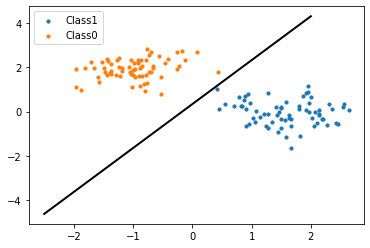

In [46]:
#Plotting the decision boundry 
plotDecisionBoundry(X_trn, Y_trn,theta)

In [47]:
#Computing Log loss to evaluate on test data
loss=logLoss(X_tst,Y_tst, theta)
print("Log loss : ", float(loss))

Log loss :  0.002132414995965543


<b>(c)  Repeat (2) for HW2-3. Explain the differences between two datasetsand justify your results / observations.  [5 Points] </b>

In [48]:
%%capture
#importing data from .mat file
!wget https://github.com/apoorvamalemath/SML/blob/main/data2.mat?raw=true 
!mv data2.mat\?raw\=true data2.mat
data2 = scipy.io.loadmat('data2.mat')

#Extracting data from the data1 Dictionary
X_trn=pd.DataFrame(data2['X_trn'])
X_tst=pd.DataFrame(data2['X_tst'])

Y_trn=pd.DataFrame(data2['Y_trn'])
Y_tst=pd.DataFrame(data2['Y_tst'])

#creating Phi(x) matrix for train data and test data by Appending '1' column 
X_trn.insert(0,'constant',1)
X_tst.insert(0,'constant',1)

In [41]:
#Fitting the logistic Regression Model
rho=0.0001
n=1000
theta=LogisticRegression(X_trn,Y_trn, rho,n)
print("Theta using the logistic Regression: ")
print(theta)

Theta using the logistic Regression: 
[[ 0.39161236]
 [ 2.17102042]
 [-0.35971089]]


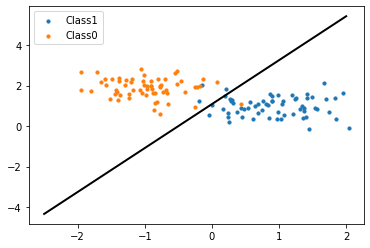

In [42]:
#Plotting the decision boundry 
plotDecisionBoundry(X_trn, Y_trn,theta)

In [43]:
#Computing Log loss to evaluate on test data
loss=logLoss(X_tst,Y_tst, theta)
print("Log loss : ", float(loss))

Log loss :  0.02831373338731127


 On comparing the above two plots, it is observered that in data1 there are just 2 points that are very close to the decision boundry. However, they are still getting classified in their respective classes. On observing data2, the classes overlap a little, it is seen that few points close to the decision boundry are getting classified in the wrong class. And log loss for data1 is lower than the log loss observed for data2.
